<a href="https://colab.research.google.com/github/jaeyoonjeong9024/9weeks/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [53]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다.

df = pd.read_csv('/content/creditcard.csv')

In [54]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,30631,-0.377215,0.973528,1.647077,0.732439,0.024728,-0.541379,0.828488,-0.060740,-0.725148,...,0.228443,0.685913,-0.107687,0.631740,0.126366,-0.327633,0.056522,0.033139,29.90,0.0
19894,30631,1.209281,0.078793,0.061820,0.593730,-0.235772,-0.448524,-0.141196,0.089236,0.411825,...,-0.302369,-0.984051,0.130401,-0.390756,0.105615,0.152881,-0.025292,0.021130,16.00,0.0
19895,30632,1.286596,-1.450336,0.814530,-1.308949,-2.055209,-0.592064,-1.317286,0.032386,-1.720017,...,0.040743,0.262534,-0.045112,0.515660,0.218606,-0.138794,0.026395,0.030885,92.00,0.0
19896,30633,-0.488090,1.018448,0.670593,-0.245462,0.828347,-0.233102,0.662586,-0.040028,-0.279439,...,-0.344859,-0.902035,-0.050171,-1.060827,0.062221,0.150428,0.130266,0.067290,1.99,0.0


In [55]:
df.shape

(19898, 31)

In [56]:
# 결측치 홗인

df.isnull().values.any()

np.True_

In [57]:
LABELS = ["Normal", "Fraud"]

/tmp/ipython-input-2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


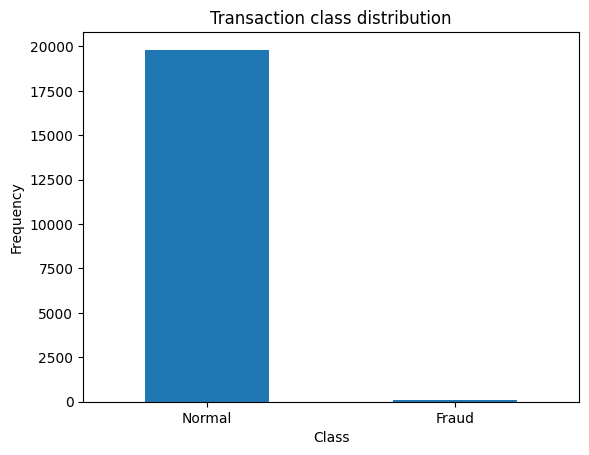

In [58]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [59]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(85, 31)

In [60]:
normal.shape

(19812, 31)

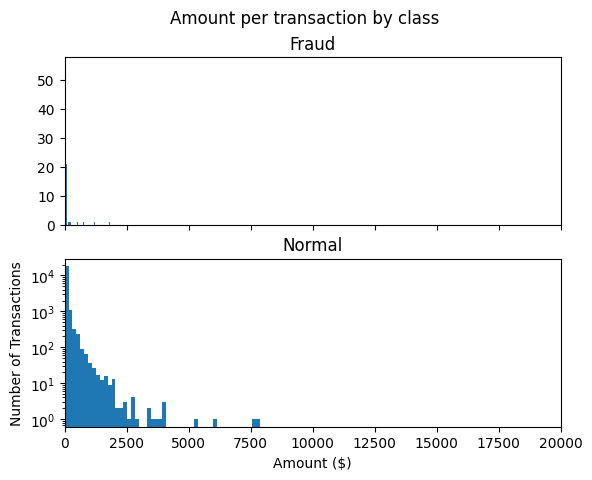

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

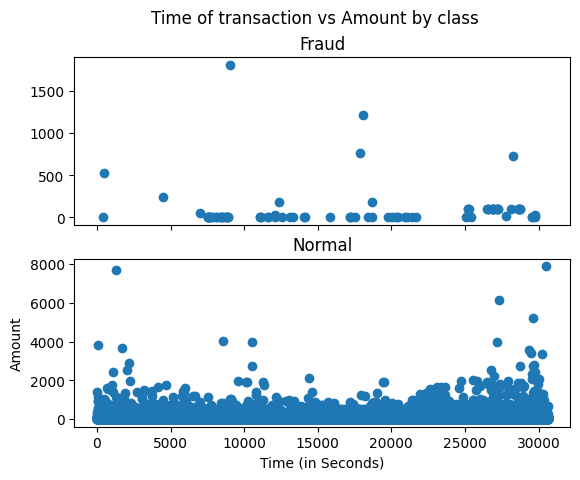

In [62]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [64]:
# 모델을 오직 정상 거래기록으로만 훈련
# 정상 거래기록을 테스트셋에 넣으면 모델의 성능을 평가

In [65]:
RANDOM_SEED = 42

In [66]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(15846, 29)

In [67]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [68]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [69]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4421 - val_loss: 1.2063
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2967 - val_loss: 1.0769
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1778 - val_loss: 0.9688
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1164 - val_loss: 0.9356
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0822 - val_loss: 0.9109
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0551 - val_loss: 0.8900
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9952 - val_loss: 0.8764
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0337 - val_loss: 0.8658
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0055 - val_loss: 0.8580
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9767 - val_loss: 0.8513
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0030 - val_loss: 0.8451
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0602 - val_

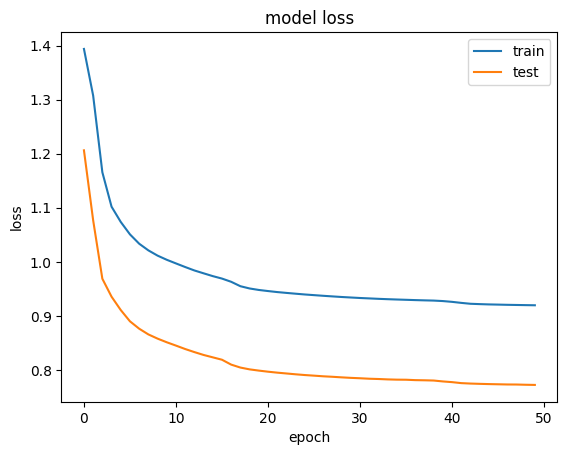

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [71]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,reconstruction_error,true_class
count,3980.000000,3980.000000
mean,1.117044,0.003518
std,5.255688,0.059212
min,0.062571,0.000000
25%,0.334276,0.000000
50%,0.514921,0.000000
75%,0.782315,0.000000
max,164.084538,1.000000


In [72]:
error_df.head()

,reconstruction_error,true_class
10452,0.975524,0.0
1512,0.507278,0.0
18467,0.149751,0.0
9992,1.216729,0.0
15405,1.067742,0.0


In [73]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

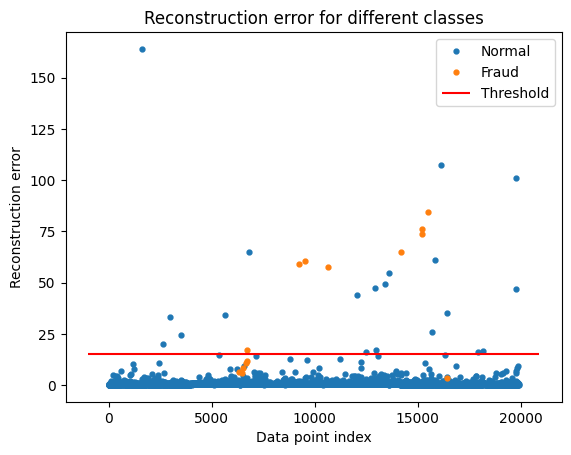

In [74]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

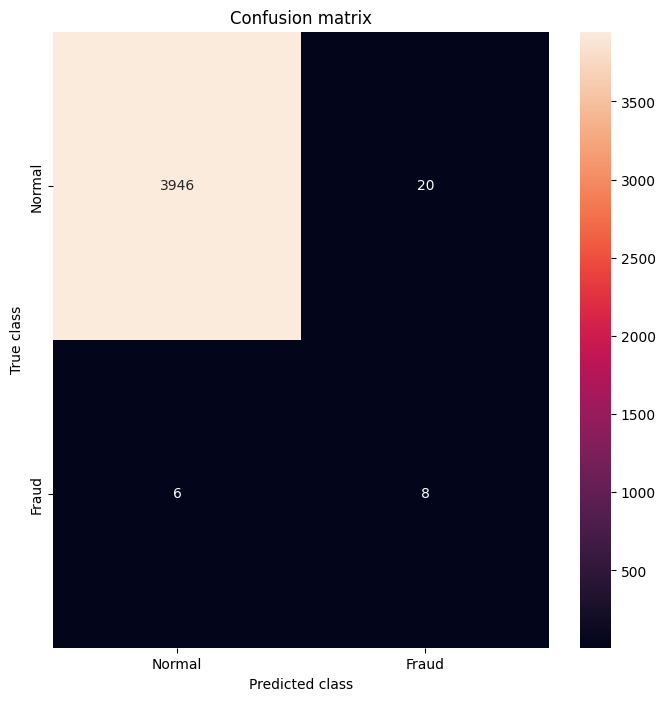

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3966
         1.0       0.29      0.57      0.38        14

    accuracy                           0.99      3980
   macro avg       0.64      0.78      0.69      3980
weighted avg       1.00      0.99      0.99      3980



In [75]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))